In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Swain vs. Alabama ##

### Hypothesis Test

In [3]:
population_proportions = make_array(.26, .74) # Start with population values

def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

panels = make_array()

num_simulations = 100000

for i in np.arange(num_simulations):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

p-value =  0.0


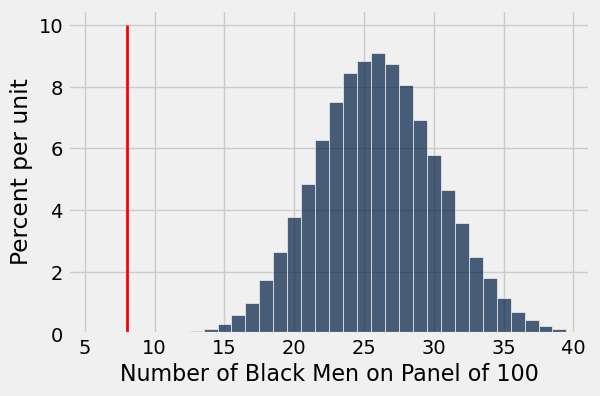

In [4]:
Table().with_column('Number of Black Men on Panel of 100', panels).hist(bins=np.arange(5.5,40.))
plots.plot([8, 8], [0, .1], color='red', lw=2);
print("p-value = ", sum(panels <= 8)/num_simulations)

### Confidence Interval 

In [8]:
sample_panel_proportions = make_array(.08, .92) # Start with sample data statistics

def bootstrap_proportion(size, distribution):
    return sample_proportions(size, distribution).item(0)

bootstrap_panels = make_array()

for i in np.arange(num_simulations):
    new_bootstrap_panel = bootstrap_proportion(100, sample_panel_proportions) * 100
    bootstrap_panels = np.append(bootstrap_panels, new_bootstrap_panel)


In [9]:
left = percentile(2.5, bootstrap_panels)
right = percentile(97.5, bootstrap_panels)

left, right

(3.0, 14.000000000000002)

We predict with 95% confidence that if the jury pool were randomly selected,
it was selected from a population of between 3.0 and 14.0 percent black men.


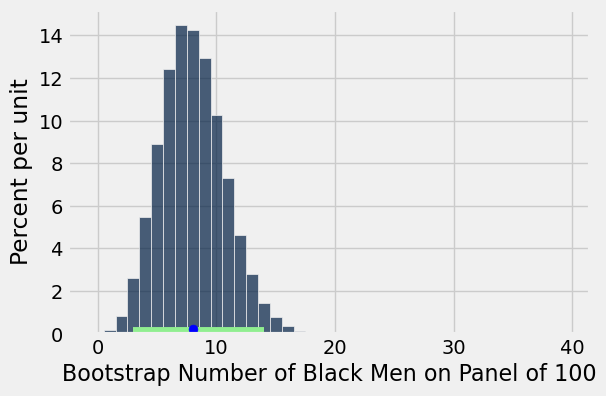

In [10]:
Table().with_column(
    'Bootstrap Number of Black Men on Panel of 100', bootstrap_panels
).hist(bins=np.arange(-0.5,40.))

plots.plot([left,right], [0,0], color="lightgreen", lw=10, zorder=1);
plots.scatter(8, 0.002, color="blue", s=40, zorder=2);
print("We predict with 95% confidence that if the jury pool were randomly selected,")
print("it was selected from a population of between", left, "and",np.round(right,1), "percent black men.")

### Null and Bootstrap Distributions Together

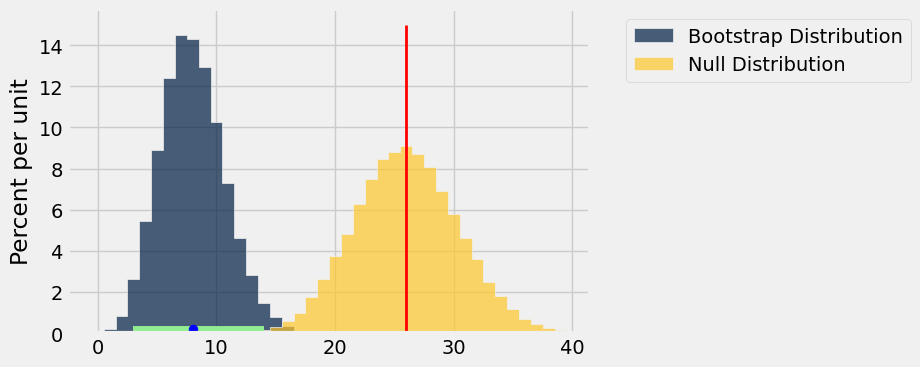

In [11]:
Table().with_columns(
    'Bootstrap Distribution', bootstrap_panels,
    'Null Distribution', panels
).hist(bins=np.arange(-0.5,40.))

plots.plot(
    [left,right], 
    [0,0], 
    color="lightgreen", 
    lw=10, 
    zorder=1
);
plots.scatter(
    sample_panel_proportions.item(0)*100,
    0.002,
    color="blue",
    s=40,
    zorder=2);

plots.plot(
    [population_proportions.item(0)*100, population_proportions.item(0)*100], 
    [0, .15], 
    color='red', 
    lw=2
);

### Significance Level?

In [12]:
left90 = percentile(5, bootstrap_panels)
right90 = percentile(95, bootstrap_panels)

left90, right90

(4.0, 13.0)

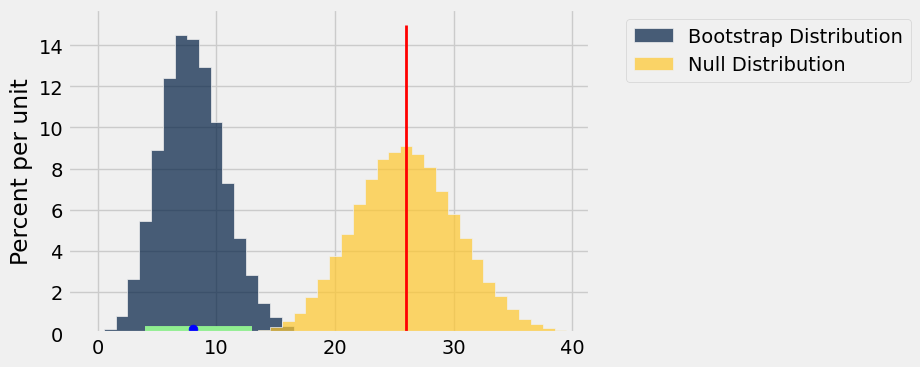

In [13]:
Table().with_columns(
    'Bootstrap Distribution', bootstrap_panels,
    'Null Distribution', panels
).hist(bins=np.arange(-0.5,40.))

plots.plot(
    [left90,right90], 
    [0,0], 
    color="lightgreen", 
    lw=10, 
    zorder=1
);
plots.scatter(
    sample_panel_proportions.item(0)*100,
    0.002,
    color="blue",
    s=40,
    zorder=2);

plots.plot(
    [population_proportions.item(0)*100, population_proportions.item(0)*100], 
    [0, .15], 
    color='red', 
    lw=2
);

## Do Babies Understand Probability?

### Hypothesis Test

In [14]:
model_proportions = make_array(0.5, 0.5)

def statistic(expected_prop, actual_prop):
    return 100*abs(expected_prop - actual_prop)

observed_statistic = statistic(0.5, 18/24)

def simulation_and_statistic(model_proportions, expected_proportion_correct):
       
    simulation_proportion_correct = sample_proportions(24, model_proportions)
    one_statistic = statistic(simulation_proportion_correct.item(0), expected_proportion_correct)
    
    return one_statistic

In [15]:
simulated_statistics = make_array()

for i in np.arange(num_simulations):
    simulated_statistic = simulation_and_statistic(model_proportions, 0.5)
    simulated_statistics = np.append(simulated_statistics, simulated_statistic)

p-value:   0.02255


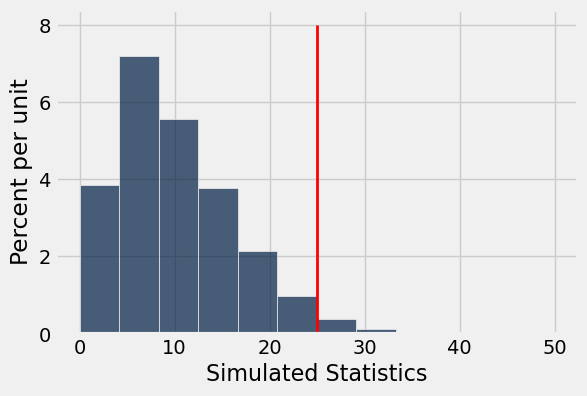

In [16]:
Table().with_column('Simulated Statistics', simulated_statistics).hist(bins = np.arange(0, 50, 4.16))
plots.plot([observed_statistic, observed_statistic], [0, .08], color='red', lw=2);

print("p-value:  ", sum(simulated_statistics >= observed_statistic)/num_simulations)

### Confidence Interval 

In [17]:
sample_tt_proportions = make_array(18/24, 6/24)

bootstrap_tt = make_array()

for i in np.arange(num_simulations):
    new_bootstrap_tt = bootstrap_proportion(24, sample_tt_proportions)*100 - 50
    bootstrap_tt = np.append(bootstrap_tt, new_bootstrap_tt)

In [18]:
left_tt_95 = percentile(2.5, bootstrap_tt)
right_tt_95 = percentile(97.5, bootstrap_tt)

left_tt_95, right_tt_95

(8.3333333333333357, 41.666666666666657)

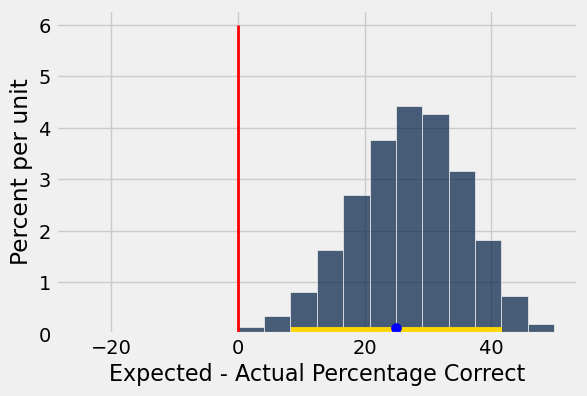

In [19]:
Table().with_column(
    'Expected - Actual Percentage Correct', bootstrap_tt
).hist(bins = np.arange(-25, 50, 4.16))

plots.plot([left_tt_95,right_tt_95], [0,0], color="gold", lw=10, zorder=1);
plots.scatter(observed_statistic, 0.001, color="blue", s=50, zorder=2);
plots.plot([0, 0], [0, .06], color='red', lw=2);

### One Sided Hypotheses

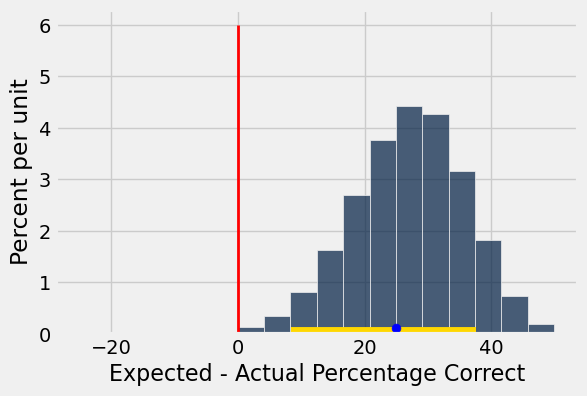

In [20]:
left_tt_90 = percentile(5, bootstrap_tt)
right_tt_90 = percentile(95, bootstrap_tt)

left_tt_90, right_tt_90

Table().with_column(
    'Expected - Actual Percentage Correct', bootstrap_tt
).hist(bins = np.arange(-25, 50, 4.16))

plots.plot([left_tt_90,right_tt_90], [0,0], color="gold", lw=10, zorder=1);
plots.scatter(observed_statistic, 0.001, color="blue", s=40, zorder=2);
plots.plot([0, 0], [0, .06], color='red', lw=2);